### 30. 문제집
- [#1766](https://www.acmicpc.net/problem/1766)

**문제**
- 민오는 1번부터 N번까지 총 N개의 문제로 되어 있는 문제집을 풀려고 한다. 문제는 난이도 순서로 출제되어 있다. 즉 1번 문제가 가장 쉬운 문제이고 N번 문제가 가장 어려운 문제가 된다.

- 어떤 문제부터 풀까 고민하면서 문제를 훑어보던 민오는, 몇몇 문제들 사이에는 '먼저 푸는 것이 좋은 문제'가 있다는 것을 알게 되었다. 예를 들어 1번 문제를 풀고 나면 4번 문제가 쉽게 풀린다거나 하는 식이다. 민오는 다음의 세 가지 조건에 따라 문제를 풀 순서를 정하기로 하였다.

> - N개의 문제는 모두 풀어야 한다.
> - 먼저 푸는 것이 좋은 문제가 있는 문제는, 먼저 푸는 것이 좋은 문제를 반드시 먼저 풀어야 한다.
> - 가능하면 쉬운 문제부터 풀어야 한다.
> -예를 들어서 네 개의 문제가 있다고 하자. 4번 문제는 2번 문제보다 먼저 푸는 것이 좋고, 3번 문제는 1번 문제보다 먼저 푸는 것이 좋다고 하자. 만일 4-3-2-1의 순서로 문제를 풀게 되면 조건 1과 조건 2를 만족한다. 하지만 조건 3을 만족하지 않는다. 4보다 3을 충분히 먼저 풀 수 있기 때문이다. 따라서 조건 3을 만족하는 문제를 풀 순서는 3-1-4-2가 된다.

- 문제의 개수와 먼저 푸는 것이 좋은 문제에 대한 정보가 주어졌을 때, 주어진 조건을 만족하면서 민오가 풀 문제의 순서를 결정해 주는 프로그램을 작성하시오.

**입력**
- 첫째 줄에 문제의 수 N(1 ≤ N ≤ 32,000)과 먼저 푸는 것이 좋은 문제에 대한 정보의 개수 M(1 ≤ M ≤ 100,000)이 주어진다. 둘째 줄부터 M개의 줄에 걸쳐 두 정수의 순서쌍 A,B가 빈칸을 사이에 두고 주어진다. 이는 A번 문제는 B번 문제보다 먼저 푸는 것이 좋다는 의미이다.

- 항상 문제를 모두 풀 수 있는 경우만 입력으로 주어진다.

**출력**
- 첫째 줄에 문제 번호를 나타내는 1 이상 N 이하의 정수들을 민오가 풀어야 하는 순서대로 빈칸을 사이에 두고 출력한다.

**예제 입력**
```
4 2
4 2
3 1
```

**예제 출력**
```
3 1 4 2
```

**문제 풀이 핵심 아이디어**
- 본 문제는 전형적인 **위상 정렬** 문제입니다.
- 위상 정렬은 **순서가 정해져 있는 작업**들을 차례대로 수행해야 할 때, 순서를 결정해주는 알고리즘입니다.
- 위상 정렬의 시간 복잡도는 $O(V + E)$로 문제를 해결할 수 있습니다.

**위상 정렬 알고리즘**
1. 진입 차수가 0인 정점을 큐에 삽입합니다.
2. 큐에서 원소를 꺼내 해당 원소와 간선을 제거합니다.
3. 제거 이후에 진입 차수가 0이 된 정점을 큐에 삽입합니다.
4. 큐가 빌 때까지 2, 3 과정을 반복합니다.

- 모든 원소를 방문하기 전에 큐가 빈다면 사이클이 존재하는 것입니다.
- 모든 원소를 방문했다면 큐에서 꺼낸 순서가 위상 정렬의 결과입니다.

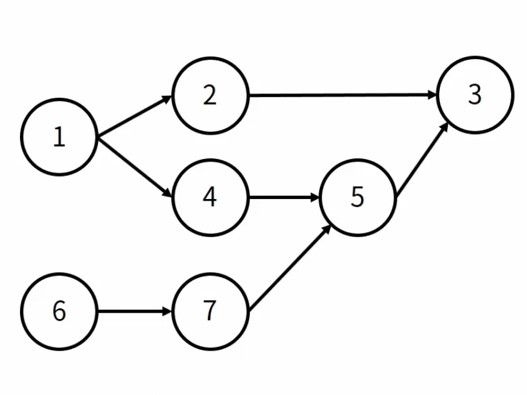

- 정답: 1 => 6 => 2 => 4 => 7 => 5 => 3

**소스코드**

In [1]:
import heapq

n, m = map(int, input().split())
array = [[] for _ in range(n + 1)]
indegree = [0] * (n + 1)  # 각 노드의 진입 차수

heap = list()
result = list()

for _ in range(m):
    x, y = map(int, input().split())
    array[x].append(y)
    indegree[y] += 1
    
for idx in range(1, n + 1):
    if indegree[idx] == 0:
        heapq.heappush(heap, idx)
        
while heap:
    data = heapq.heappop(heap)
    result.append(data)
    
    for y in array[data]:
        indegree[y] -= 1
        
        if indegree[y] == 0:
            heapq.heappush(heap, y)
            
for idx in result:
    print(idx, end=' ')

4 2
4 2
3 1
3 1 4 2 